In [47]:
# importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# loading the dataset
pd.set_option('display.max_columns', 100)
df = pd.read_csv('Data/stress_combined.csv')
df.head(5)

,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,EDAR_Mean,EDAR_Min,EDAR_Max,EDAR_Std,EDAR_Kurtosis,EDAR_Skew,Num_PeaksR,EDAR_Amphitude,EDAR_Duration,HRR_Mean,HRR_Min,HRR_Max,HRR_Std,HRR_RMS,TEMPR_Mean,TEMPR_Min,TEMPR_Max,TEMPR_Std,Stress
0,0.132578,0.123534,0.115152,0.110787,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,0.084598,0.089846,0.094890,0.098347,0.101107,0.104240,0.108121,0.112588,0.117063,0.119653,0.119543,0.119534,0.119619,0.116757,0.112927,0.111942,0.112800,0.112375,0.110703,0.108223,0.105191,0.104202,0.107022,0.035656,0.224016,0.556235,0.0,0.000000,0.0,0.641552,0.639566,0.643243,0.100525,0.235069,0.821491,0.821239,0.823944,0.120422,0.0
1,0.123534,0.115152,0.110787,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,0.084598,0.089846,0.094890,0.098347,0.101107,0.104240,0.108121,0.112588,0.117063,0.119653,0.119543,0.119534,0.119619,0.116757,0.112927,0.111942,0.112800,0.112375,0.110703,0.108223,0.105191,0.102822,0.102238,0.103630,0.023788,0.245929,0.506460,0.0,0.000000,0.0,0.642973,0.639566,0.643243,0.089270,0.229293,0.827471,0.828319,0.830986,0.105027,0.0
2,0.115152,0.110787,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,0.084598,0.089846,0.094890,0.098347,0.101107,0.104240,0.108121,0.112588,0.117063,0.119653,0.119543,0.119534,0.119619,0.116757,0.112927,0.111942,0.112800,0.112375,0.110703,0.108223,0.105191,0.102822,0.101157,0.101213,0.101679,0.018717,0.239148,0.594386,0.0,0.033423,0.0,0.643921,0.640921,0.645946,0.083372,0.157093,0.832395,0.831858,0.834507,0.099446,0.0
3,0.110787,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,0.084598,0.089846,0.094890,0.098347,0.101107,0.104240,0.108121,0.112588,0.117063,0.119653,0.119543,0.119534,0.119619,0.116757,0.112927,0.111942,0.112800,0.112375,0.110703,0.108223,0.105191,0.102822,0.101157,0.099952,0.100359,0.099644,0.011283,0.192728,0.504364,0.0,0.000000,0.0,0.645952,0.644986,0.645946,0.041375,0.131024,0.837759,0.842478,0.839789,0.089739,0.0
4,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,0.084598,0.089846,0.094890,0.098347,0.101107,0.104240,0.108121,0.112588,0.117063,0.119653,0.119543,0.119534,0.119619,0.116757,0.112927,0.111942,0.112800,0.112375,0.110703,0.108223,0.105191,0.102822,0.101157,0.099952,0.099298,0.100188,0.098796,0.005735,0.315883,0.630771,0.0,0.000000,0.0,0.646764,0.644986,0.648649,0.066093,0.113470,0.843123,0.846018,0.848592,0.095171,0.0


In [3]:
# stats of the dataset
df.describe()

,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,EDAR_Mean,EDAR_Min,EDAR_Max,EDAR_Std,EDAR_Kurtosis,EDAR_Skew,Num_PeaksR,EDAR_Amphitude,EDAR_Duration,HRR_Mean,HRR_Min,HRR_Max,HRR_Std,HRR_RMS,TEMPR_Mean,TEMPR_Min,TEMPR_Max,TEMPR_Std,Stress
count,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000,12445.000000
mean,0.210099,0.210089,0.210079,0.210070,0.210062,0.210053,0.210045,0.210038,0.210031,0.210024,0.210018,0.210012,0.210006,0.209999,0.209992,0.209984,0.209976,0.209968,0.209960,0.209951,0.209943,0.209934,0.209926,0.209919,0.209913,0.209908,0.209905,0.209902,0.209900,0.209898,0.209896,0.207127,0.213239,0.063885,0.255964,0.499688,0.074126,0.034073,0.041134,0.531330,0.529921,0.532379,0.058898,0.137165,0.467482,0.469041,0.469000,0.082092,0.949779
std,0.104249,0.104263,0.104277,0.104290,0.104302,0.104314,0.104326,0.104338,0.104348,0.104358,0.104367,0.104376,0.104386,0.104397,0.104408,0.104419,0.104431,0.104442,0.104454,0.104466,0.104478,0.104490,0.104501,0.104510,0.104517,0.104523,0.104527,0.104530,0.104532,0.104534,0.104536,0.102917,0.106653,0.082410,0.075424,0.108185,0.181042,0.055403,0.108801,0.236169,0.236633,0.235474,0.030202,0.048432,0.206970,0.208774,0.206760,0.047557,0.903741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.143117,0.141100,0.145862,0.019800,0.213429,0.435413,0.000000,0.000000,0.000000,0.328595,0.323848,0.329730,0.043969,0.103584,0.322371,0.320354,0.323944,0.056860,0.000000
50%,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.206731,0.204732,0.209803,0.039781,0.230821,0.500000,0.000000,0.016132,0.000000,0.573044,0.571816,0.575676,0.054869,0.131024,0.512487,0.513274,0.514085,0.072770,1.000000
75%,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.259721,0.257687,0.262466,0.075773,0.271973,0.566254,0.000000,0.044128,0.000000,0.740726,0.739837,0.740541,0.068181,0.160471,0.625923,0.630088,0.626761,0.093023,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000

# Data Preprocessing

In [4]:
# shape of the dataset
df.shape

(12445, 49)

In [5]:
# chceking the missing values
df.isna().sum()

30                0
29                0
28                0
27                0
26                0
25                0
24                0
23                0
22                0
21                0
20                0
19                0
18                0
17                0
16                0
15                0
14                0
13                0
12                0
11                0
10                0
9                 0
8                 0
7                 0
6                 0
5                 0
4                 0
3                 0
2                 0
1                 0
EDAR_Mean         0
EDAR_Min          0
EDAR_Max          0
EDAR_Std          0
EDAR_Kurtosis     0
EDAR_Skew         0
Num_PeaksR        0
EDAR_Amphitude    0
EDAR_Duration     0
HRR_Mean          0
HRR_Min           0
HRR_Max           0
HRR_Std           0
HRR_RMS           0
TEMPR_Mean        0
TEMPR_Min         0
TEMPR_Max         0
TEMPR_Std         0
Stress            0
dtype: int64

In [6]:
# chceking the datatype
df.dtypes

30                float64
29                float64
28                float64
27                float64
26                float64
25                float64
24                float64
23                float64
22                float64
21                float64
20                float64
19                float64
18                float64
17                float64
16                float64
15                float64
14                float64
13                float64
12                float64
11                float64
10                float64
9                 float64
8                 float64
7                 float64
6                 float64
5                 float64
4                 float64
3                 float64
2                 float64
1                 float64
EDAR_Mean         float64
EDAR_Min          float64
EDAR_Max          float64
EDAR_Std          float64
EDAR_Kurtosis     float64
EDAR_Skew         float64
Num_PeaksR        float64
EDAR_Amphitude    float64
EDAR_Duratio

In [7]:
# class variation
df['Stress'].value_counts()

0.0    5410
2.0    4785
1.0    2250
Name: Stress, dtype: int64

In [8]:
df['Stress'].value_counts(normalize = True)

0.0    0.434713
2.0    0.384492
1.0    0.180796
Name: Stress, dtype: float64

In [9]:
# chceking the corelation
df.corr()

,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,EDAR_Mean,EDAR_Min,EDAR_Max,EDAR_Std,EDAR_Kurtosis,EDAR_Skew,Num_PeaksR,EDAR_Amphitude,EDAR_Duration,HRR_Mean,HRR_Min,HRR_Max,HRR_Std,HRR_RMS,TEMPR_Mean,TEMPR_Min,TEMPR_Max,TEMPR_Std,Stress
30,1.000000,0.996489,0.987362,0.973598,0.956109,0.935672,0.912986,0.888677,0.863334,0.837544,0.811917,0.787108,0.763769,0.742321,0.722744,0.704751,0.688060,0.672446,0.657719,0.643722,0.630334,0.617461,0.605032,0.593021,0.581444,0.570296,0.559551,0.549204,0.539281,0.529815,0.520833,0.524214,0.517547,0.136839,-0.019737,0.006401,0.008826,0.146226,-0.001620,0.020029,0.019837,0.020192,0.018122,0.004010,0.011182,0.011081,0.011393,0.006058,0.307873
29,0.996489,1.000000,0.996490,0.987366,0.973606,0.956122,0.935691,0.913011,0.888709,0.863372,0.837589,0.811968,0.787163,0.763830,0.742387,0.722815,0.704826,0.688139,0.672529,0.657805,0.643811,0.630426,0.617552,0.605118,0.593101,0.581515,0.570357,0.559604,0.549251,0.539326,0.529861,0.533217,0.526577,0.140473,-0.018236,0.005877,0.008048,0.147145,-0.002211,0.019991,0.019798,0.020151,0.017812,0.003524,0.011200,0.011107,0.011412,0.006184,0.307666
28,0.987362,0.996490,1.000000,0.996492,0.987370,0.973613,0.956134,0.935708,0.913034,0.888738,0.863407,0.837630,0.812014,0.787215,0.763888,0.742450,0.722883,0.704899,0.688216,0.672609,0.657888,0.643897,0.630511,0.617633,0.605192,0.593166,0.581571,0.570405,0.559646,0.549292,0.539368,0.542680,0.536103,0.144626,-0.016863,0.005795,0.006965,0.148305,-0.003072,0.019965,0.019773,0.020119,0.017330,0.003324,0.011264,0.011180,0.011474,0.006258,0.307662
27,0.973598,0.987366,0.996492,1.000000,0.996492,0.987373,0.973620,0.956145,0.935724,0.913056,0.888765,0.863440,0.837668,0.812058,0.787265,0.763943,0.742511,0.722949,0.704970,0.688290,0.672687,0.657968,0.643977,0.630586,0.617702,0.605253,0.593217,0.581614,0.570442,0.559681,0.549328,0.552571,0.546106,0.149377,-0.015610,0.005279,0.006060,0.150039,-0.003730,0.019961,0.019772,0.020110,0.016781,0.003317,0.011372,0.011287,0.011585,0.006491,0.307829
26,0.956109,0.973606,0.987370,0.996492,1.000000,0.996493,0.987376,0.973626,0.956155,0.935739,0.913076,0.888791,0.863471,0.837705,0.812101,0.787314,0.763998,0.742571,0.723014,0.705039,0.688363,0.672763,0.658044,0.644048,0.630652,0.617759,0.605301,0.593257,0.581648,0.570475,0.559715,0.562867,0.556562,0.154712,-0.014476,0.005191,0.005482,0.151948,-0.003907,0.019983,0.019796,0.020129,0.016256,0.003415,0.011535,0.011446,0.011758,0.007147,0.308124
25,0.935672,0.956122,0.973613,0.987373,0.996493,1.000000,0.996494,0.987379,0.973633,0.956166,0.935755,0.913097,0.888816,0.863502,0.837741,0.812143,0.787362,0.764052,0.742631,0.723078,0.705107,0.688434,0.672834,0.658112,0.644110,0.630706,0.617804,0.605338,0.593290,0.581679,0.570507,0.573541,0.567460,0.160772,-0.013438,0.005314,0.004180,0.153678,-0.004599,0.020029,0.019848,0.020171,0.015629,0.003770,0.011761,0.011674,0.011991,0.007615,0.308495
24,0.912986,0.935691,0.956134,0.973620,0.987376,0.996494,1.000000,0.996495,0.987382,0.973639,0.956177,0.935770,0.913116,0.888840,0.863532,0.837777,0.812185,0.787411,0.764106,0.742690,0.723142,0.705174,0.688502,0.672899,0.658171,0.644162,0.630749,0.617839,0.605369,0.593318,0.581709,0.584585,0.578812,0.167716,-0.014945,0.004725,0.002589,0.155234,-0.005825,0.020099,0.019923,0.020237,0.015203,0.005009,0.012042,0.011954,0.012277,0.007997,0.308829
23,0.888677,0.913011,0.935708,0.956145,0.973626,0.987379,0.996495,1.000000,0.996496,0.987385,0.973645,0.956186,0.935783,0.913134,0.888864,0.863561,0.837813,0.812227,0.787458,0.764160,0.742748,0.723203,0.705237,0.688562,0.672954,0.658219,0.644201,0.630781,0.617867,0.605394,0.593345,0.596018,0.590633,0.175543,-0.016207,0.004415,0.000689,0.156519,-0.007496,0.020197,0.020026,0.020334,0.014858,0.006639,0.012366,0.012276,0.012595,0.008074,0.309034
22,0.863334,0.888709,0.913034,0.935724,0.956155,0.973633,0.987382,0.996496,1.000000,0.996497,0.987388,0.973651,0.956195,0.935796,0.913152,0.888887,0.863590,0.83

In [10]:
# correlation of all columns with the class column
df.corr()['Stress']

30                0.307873
29                0.307666
28                0.307662
27                0.307829
26                0.308124
25                0.308495
24                0.308829
23                0.309034
22                0.309024
21                0.308692
20                0.307989
19                0.306968
18                0.305742
17                0.304367
16                0.302831
15                0.301196
14                0.299594
13                0.298118
12                0.296857
11                0.295868
10                0.295216
9                 0.295028
8                 0.295369
7                 0.296181
6                 0.297360
5                 0.298826
4                 0.300530
3                 0.302440
2                 0.304455
1                 0.306454
EDAR_Mean         0.308340
EDAR_Min          0.310622
EDAR_Max          0.305926
EDAR_Std          0.075108
EDAR_Kurtosis    -0.006906
EDAR_Skew        -0.010102
Num_PeaksR        0.013914
E

# Exploratory data analysis (EDA)

In [11]:
# imblacement of classes
class_normalized_counts = df['Stress'].value_counts(normalize = True)
class_normalized_counts

0.0    0.434713
2.0    0.384492
1.0    0.180796
Name: Stress, dtype: float64

In [12]:
# Expected equal distribution (assuming no bias)
expected_distribution = [1/3, 1/3, 1/3]

In [13]:
# Performing Chi-Square test for independence
chi2_stat, p_val = stats.chisquare(class_normalized_counts, expected_distribution)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)

Chi-Square Statistic: 0.10848827650016843
P-value: 0.9472008303180735


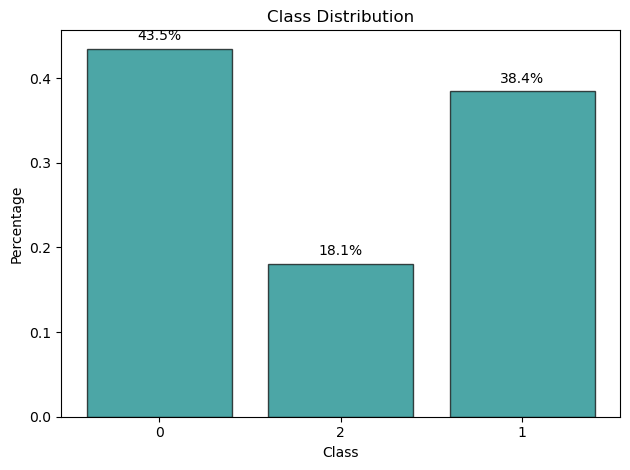

In [14]:
# Creating a bar plot to show class distribution
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')
bars = plt.bar(class_normalized_counts.index, class_normalized_counts, color='teal', tick_label=['0', '1', '2'], 
        align='center', alpha=0.7, edgecolor='black', linewidth=1)

# Adding percentage labels using autopct
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.1%}', ha='center', fontsize=10)


plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [15]:
# finding strongly connected feature with the class column
class_corr = df.corr()['Stress']
class_corr = class_corr.sort_values(ascending = False)
class_corr[1:12]

EDAR_Min     0.310622
23           0.309034
22           0.309024
24           0.308829
21           0.308692
25           0.308495
EDAR_Mean    0.308340
26           0.308124
20           0.307989
30           0.307873
27           0.307829
Name: Stress, dtype: float64

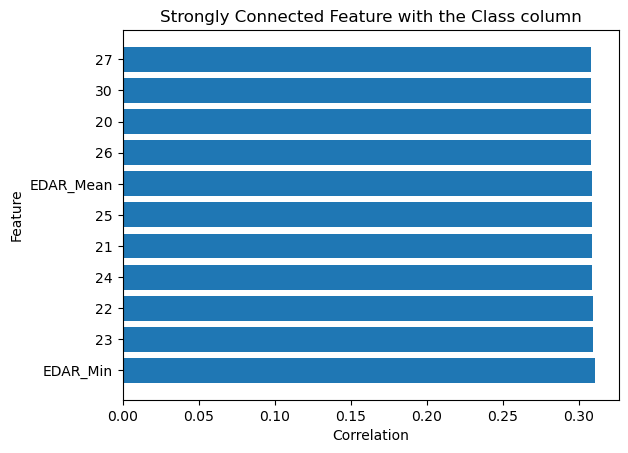

In [16]:
plt.title('Strongly Connected Feature with the Class column')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.barh(class_corr.index[1:12],class_corr[1:12])
plt.show()

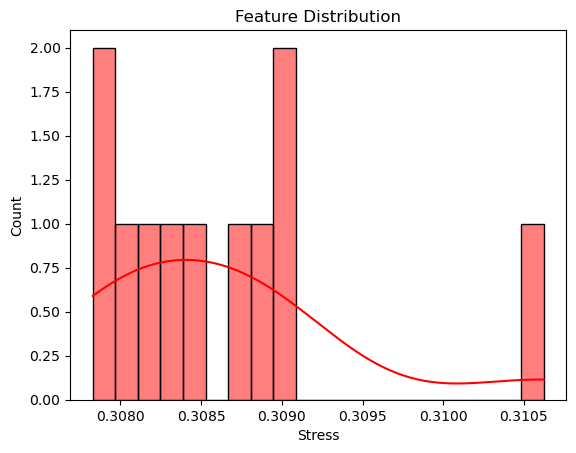

In [17]:
plt.title('Feature Distribution')
sns.histplot(class_corr[1:12],bins = 20,kde = True,color = 'red')
plt.show()

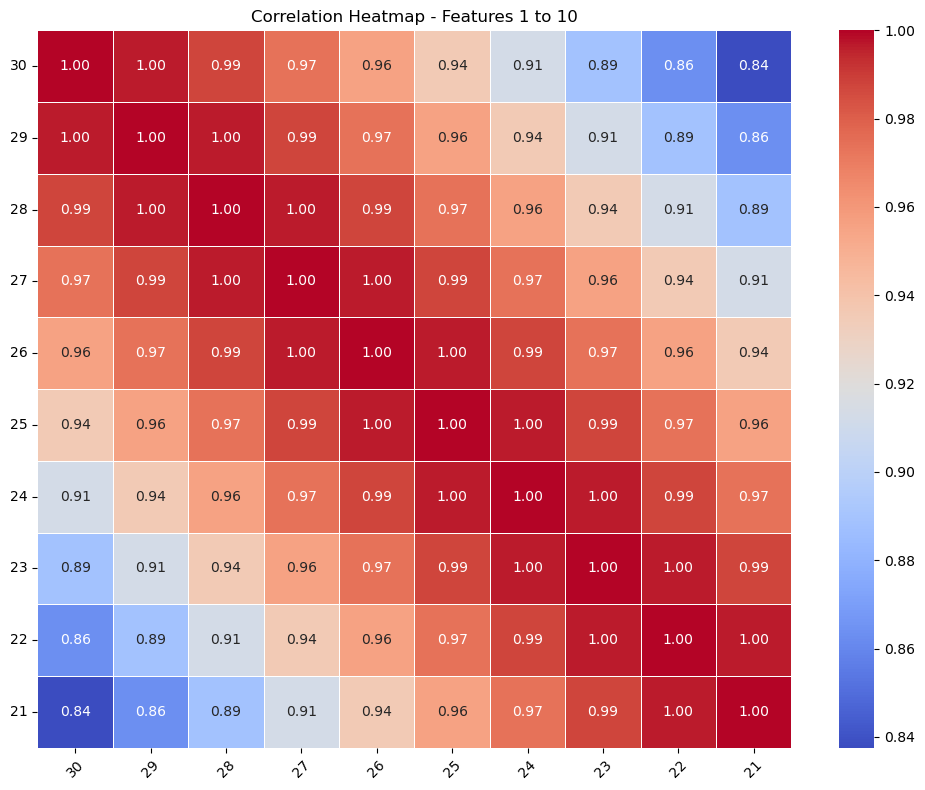

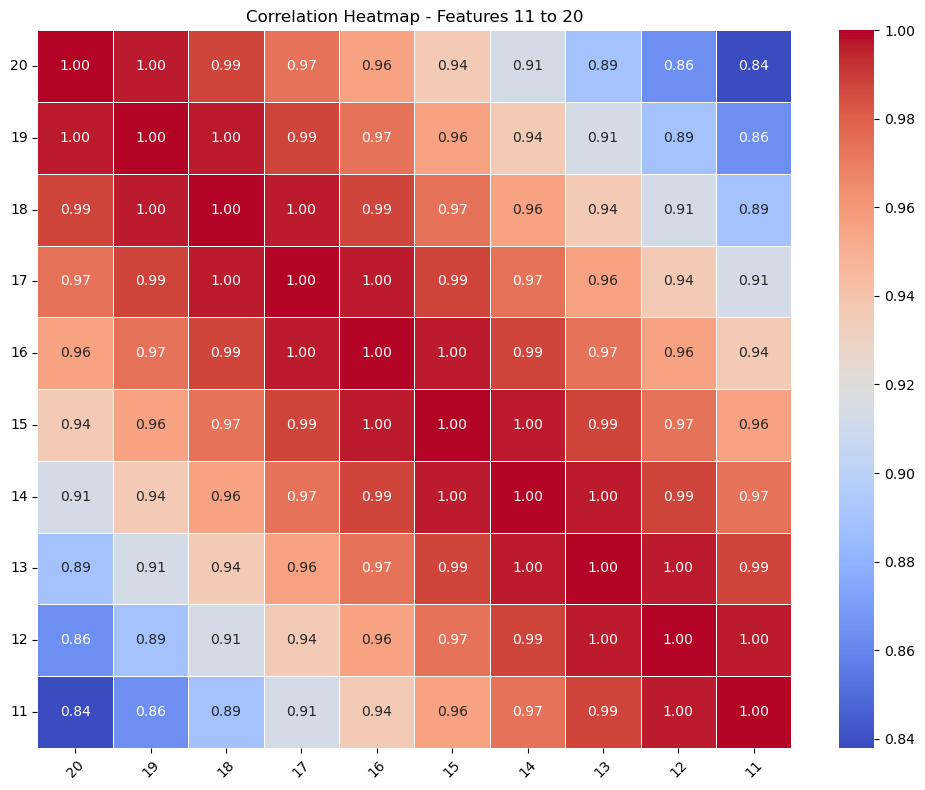

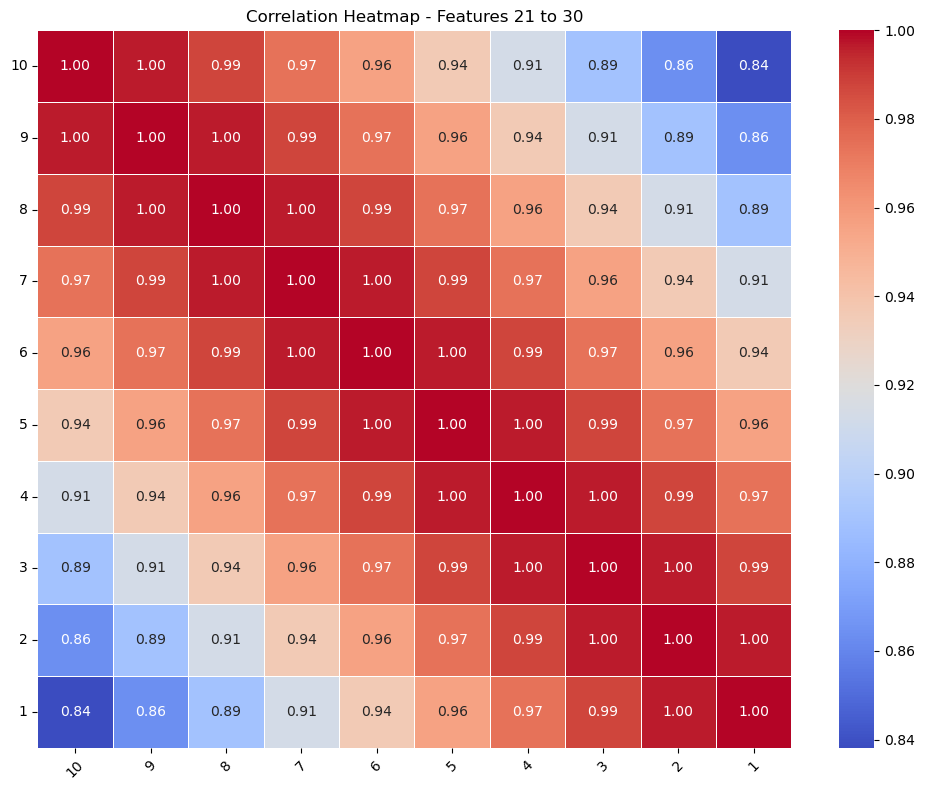

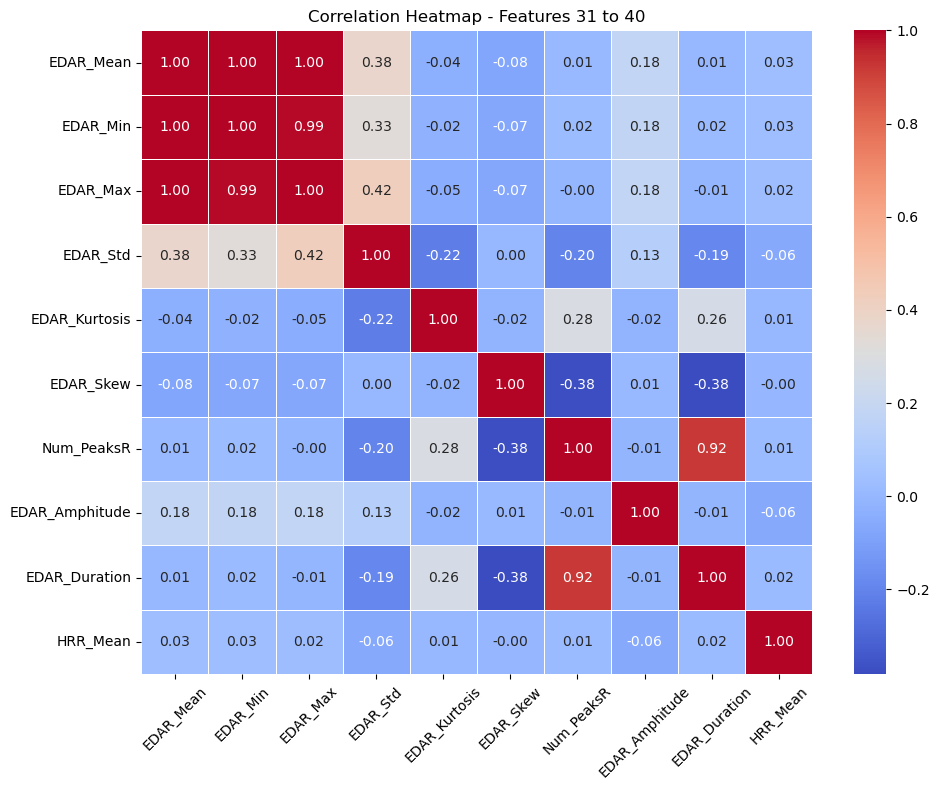

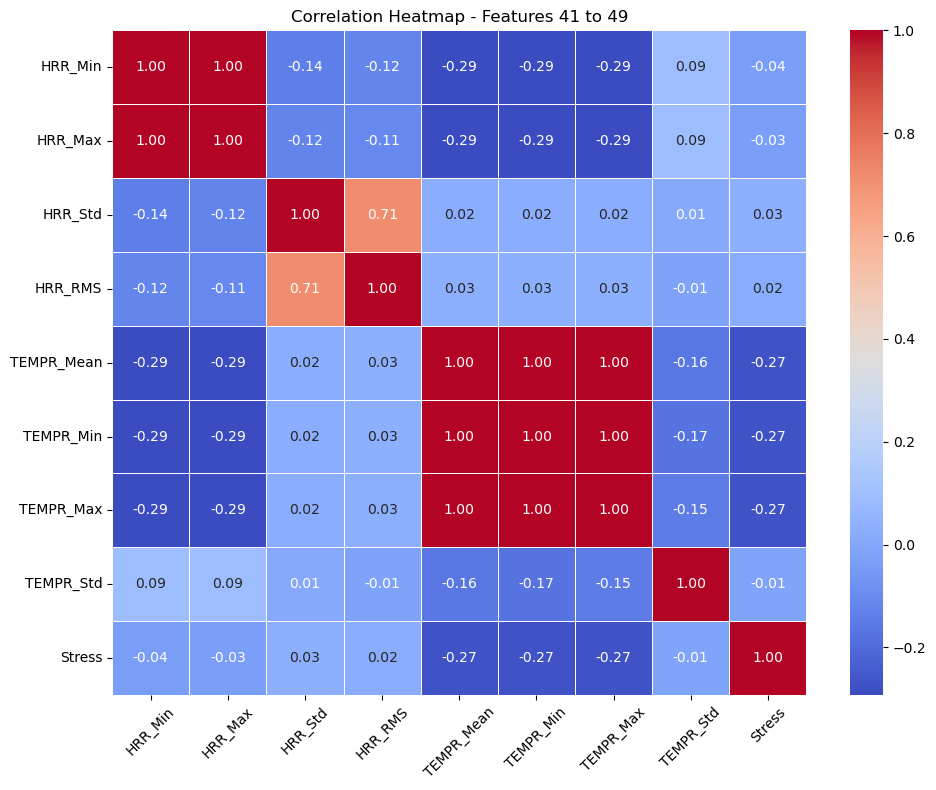

In [18]:
# drawing correlation heatmap combing 10 feature together
columns = [f'Feature_{i}' for i in range(1, 50)]
# Defining the number of features per heatmap
features_per_heatmap = 10

# Calculating the number of heatmaps needed
num_heatmaps = len(df.columns) // features_per_heatmap + 1

# Creating and displaying multiple heatmaps
for i in range(num_heatmaps):
    start_idx = i * features_per_heatmap
    end_idx = min(start_idx + features_per_heatmap, len(df.columns))
    subset_columns = df.columns[start_idx:end_idx]

    plt.figure(figsize=(10, 8))
    sns.heatmap(df[subset_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'Correlation Heatmap - Features {start_idx+1} to {end_idx}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Spliting the data into train, validation and test

In [19]:
X = df.drop(columns = ['Stress'])
y = df['Stress']

In [20]:
X_train,X1,y_train,y1 = train_test_split(X,y,test_size = 0.30, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X1.shape)
print(y1.shape)

(8711, 48)
(8711,)
(3734, 48)
(3734,)


In [21]:
# Splitting for validation and testing
X_val, X_test, y_val, y_test = train_test_split(X1, y1, test_size=0.50, random_state=42)

print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(1867, 48)
(1867,)
(1867, 48)
(1867,)


# Applying Logistic Regression Model

In [22]:
lr = LogisticRegression(C=0.1, solver='liblinear')
lr.fit(X_train,y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [23]:
y_val_pred = lr.predict(X_val.values)
accuracy_val = accuracy_score(y_val, y_val_pred)
accuracy_val

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.5934654525977504

In [24]:
y_pred = lr.predict(X_test.values)
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.65      0.79      0.71       811
         1.0       1.00      0.00      0.01       318
         2.0       0.56      0.67      0.61       738

    accuracy                           0.61      1867
   macro avg       0.74      0.49      0.44      1867
weighted avg       0.68      0.61      0.55      1867



C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Applying KNN Classifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
y_val_pred = knn.predict(X_val.values)
accuracy_val = accuracy_score(y_val,y_val_pred)
accuracy_val

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.87252276379218

In [27]:
y_pred = knn.predict(X_test.values)
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       811
         1.0       0.77      0.75      0.76       318
         2.0       0.86      0.89      0.88       738

    accuracy                           0.88      1867
   macro avg       0.86      0.85      0.85      1867
weighted avg       0.88      0.88      0.88      1867



C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Applying Gaussian Naive Bayes Classifier

In [28]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [29]:
y_val_pred = gnb.predict(X_val.values)
accuracy_val = accuracy_score(y_val,y_val_pred)
accuracy_val

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.5243706480985538

In [30]:
y_pred = gnb.predict(X_test.values)
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.72      0.63      0.67       811
         1.0       0.25      0.30      0.27       318
         2.0       0.56      0.60      0.58       738

    accuracy                           0.56      1867
   macro avg       0.51      0.51      0.51      1867
weighted avg       0.58      0.56      0.57      1867



C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Applying Decision Tree Classifier

In [31]:
dt = DecisionTreeClassifier(random_state = 0,max_depth = 23)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=23, random_state=0)

In [32]:
y_pred_val = dt.predict(X_val)
accracy_val = accuracy_score(y_val,y_pred_val)
accracy_val

0.889662560257097

In [33]:
y_pred = dt.predict(X_test)
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       811
         1.0       0.80      0.77      0.79       318
         2.0       0.88      0.90      0.89       738

    accuracy                           0.89      1867
   macro avg       0.88      0.87      0.87      1867
weighted avg       0.89      0.89      0.89      1867



# Applying C-Support Vector Classification

In [34]:
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [35]:
y_pred_val = svc.predict(X_val)
accuracy_val = accuracy_score(y_val,y_pred_val)
accuracy_val

0.7337975361542581

In [36]:
y_pred = svc.predict(X_test)
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.81       811
         1.0       0.65      0.22      0.33       318
         2.0       0.64      0.86      0.73       738

    accuracy                           0.72      1867
   macro avg       0.71      0.62      0.62      1867
weighted avg       0.72      0.72      0.70      1867



# Applying Random Forest Classifier

In [48]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [49]:
y_pred_val = rf.predict(X_val)
accuracy_val = accuracy_score(y_val,y_pred_val)
accuracy_val

0.9694697375468666

In [50]:
y_pred = rf.predict(X_test)
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       811
         1.0       0.94      0.88      0.91       318
         2.0       0.94      0.99      0.96       738

    accuracy                           0.96      1867
   macro avg       0.96      0.95      0.95      1867
weighted avg       0.96      0.96      0.96      1867



# Confusion Matrix of Random Forest Classifier

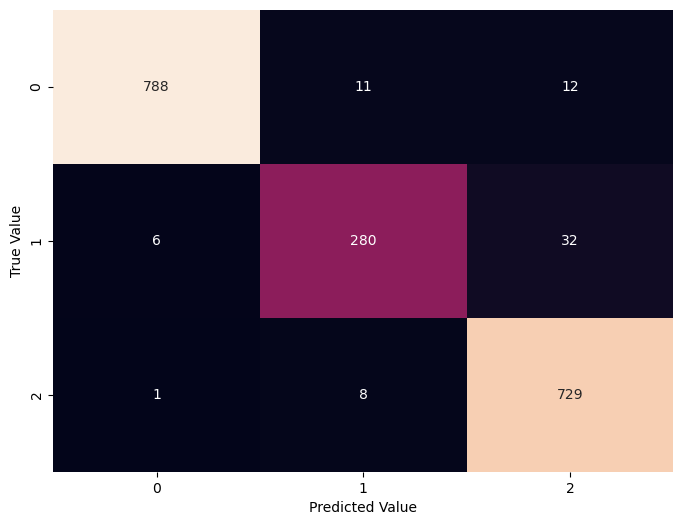

In [57]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt='d', cbar=False)
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
# Save the plot as an image
# plt.savefig('Data/confusion_matrix.png', bbox_inches='tight')

# Show the plot (optional)
plt.show()

# Applying Bagging Technique

In [40]:
# base classifiers
lr = LogisticRegression(C=0.1, solver='liblinear',random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
dt= DecisionTreeClassifier(max_depth=23, random_state=0)

# creating a BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=dt, n_estimators=40, random_state=0)
bagging_clf.fit(X_train,y_train)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=23,
                                                        random_state=0),
                  n_estimators=40, random_state=0)

In [41]:
y_pred_val = bagging_clf.predict(X_val)
accuracy_val = accuracy_score(y_val,y_pred_val)
accuracy_val

0.9512587038028923

In [42]:
y_pred = bagging_clf.predict(X_test)
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       811
         1.0       0.94      0.81      0.87       318
         2.0       0.93      0.97      0.95       738

    accuracy                           0.95      1867
   macro avg       0.95      0.92      0.93      1867
weighted avg       0.95      0.95      0.95      1867



In [43]:
# base classifiers
lr = LogisticRegression(C=0.1,max_iter=1000, random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=23, random_state=0)

# create an AdaBoostClassifier with custom majority voting
class MajorityVotingEnsemble:
    def __init__(self, classifiers):
        self.classifiers = classifiers

    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X, y)

    def predict(self, X):
        predictions = [clf.predict(X) for clf in self.classifiers]
        majority_votes = []
        for i in range(len(X)):
            votes = [p[i] for p in predictions]
            majority_vote = max(set(votes), key=votes.count)
            majority_votes.append(majority_vote)
        return majority_votes

# creating a majority voting ensemble using AdaBoostClassifier
ensemble_clf = [lr, knn, dt]
ensemble = MajorityVotingEnsemble(ensemble_clf)


ensemble.fit(X_train, y_train)

In [44]:
y_pred_val = ensemble.predict(X_val.values)
accuracy_val = accuracy_score(y_val,y_pred_val)
accuracy_val

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8677021960364221

In [45]:
y_pred = ensemble.predict(X_test.values)
cr = classification_report(y_test,y_pred)
print(cr)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       811
         1.0       0.95      0.63      0.75       318
         2.0       0.86      0.91      0.89       738

    accuracy                           0.88      1867
   macro avg       0.90      0.83      0.85      1867
weighted avg       0.89      0.88      0.88      1867



C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
